In [33]:
import pandas as pd
import time
import numpy as np
import gc

In [34]:
train= pd.read_csv('final_feature_train.csv',parse_dates=['click_time'],nrows=10000000)

In [35]:
ratio = 10
pos_df = train[train['is_attributed']==1]
neg_df = train[train['is_attributed']==0]
reduced_neg_df = neg_df.sample(ratio*len(pos_df), random_state=100)
down_train = pd.concat([pos_df]+[reduced_neg_df], ignore_index=True)

In [36]:
down_train=down_train.fillna(value=0)

In [37]:
col_names_x=['ip', 'app', 'device', 'os', 'channel', 'day', 'hour', 'minute', 'second', 'ip_tcount', 'ip_app_count', 'ip_app_os_count', 'ip_h_chan_var', 'ip_app_os_var', 'ip_app_channel_mean_hour', 'ip_nextClick', 'ip_app_nextClick', 'ip_channel_nextClick', 'ip_os_nextClick', 'ip_os_device_nextClick', 'ip_os_device_app_nextClick', 'prev_identical_clicks', 'future_identical_clicks', 'prev_app_clicks', 'future_app_clicks', 'ip_nunique_channel', 'ip_nunique_app', 'ip_nunique_hour', 'ip_app_nunique_os', 'ip_nunique_device', 'app_nunique_channel', 'ip_device_os_nunique_app', 'ip_device_os_cumcount_app', 'ip_cumcount_app', 'ip_cumcount_os']

In [38]:
col_names=['ip', 'app', 'device', 'os', 'channel','day', 'hour', 'minute', 'second','is_attributed', 'ip_tcount', 'ip_app_count', 'ip_app_os_count', 'ip_h_chan_var', 'ip_app_os_var', 'ip_app_channel_mean_hour',  'ip_nextClick', 'ip_app_nextClick', 'ip_channel_nextClick', 'ip_os_nextClick', 'ip_os_device_nextClick', 'ip_os_device_app_nextClick', 'prev_identical_clicks', 'future_identical_clicks', 'prev_app_clicks', 'future_app_clicks', 'ip_nunique_channel', 'ip_nunique_app', 'ip_nunique_hour', 'ip_app_nunique_os', 'ip_nunique_device', 'app_nunique_channel', 'ip_device_os_nunique_app', 'ip_device_os_cumcount_app', 'ip_cumcount_app', 'ip_cumcount_os']

In [39]:
down_train=down_train[col_names]

In [40]:
X_train = down_train[col_names].copy()
y_train = down_train['is_attributed'].values

In [41]:
from sklearn import preprocessing

In [42]:
minmax_scale = preprocessing.MinMaxScaler().fit(X_train)
X_train = minmax_scale.transform(X_train)

In [43]:
from pandas import DataFrame

In [44]:
train_minmax= DataFrame(X_train, columns=col_names)

In [45]:
train_minmax=train_minmax.fillna(value=0)

In [46]:
train_minmax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73964 entries, 0 to 73963
Data columns (total 36 columns):
ip                            73964 non-null float64
app                           73964 non-null float64
device                        73964 non-null float64
os                            73964 non-null float64
channel                       73964 non-null float64
day                           73964 non-null float64
hour                          73964 non-null float64
minute                        73964 non-null float64
second                        73964 non-null float64
is_attributed                 73964 non-null float64
ip_tcount                     73964 non-null float64
ip_app_count                  73964 non-null float64
ip_app_os_count               73964 non-null float64
ip_h_chan_var                 73964 non-null float64
ip_app_os_var                 73964 non-null float64
ip_app_channel_mean_hour      73964 non-null float64
ip_nextClick                  73964 non-nul

In [47]:
from __future__ import absolute_import, division, print_function
import seaborn as sns
import os, sys
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.3)

import missingno as msno
import pandas_profiling

from sklearn.datasets import make_blobs
import time

In [48]:
import gc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import GridSpec

In [49]:
from sklearn.feature_selection import VarianceThreshold

In [50]:
pandas_profiling.ProfileReport(train_minmax)

Number of variables,36
Number of observations,73964
Total Missing (%),0.0%
Total size in memory,20.3 MiB
Average record size in memory,288.0 B
Numeric,29
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,6


### variance analysis

In [19]:
var=train_minmax.var()

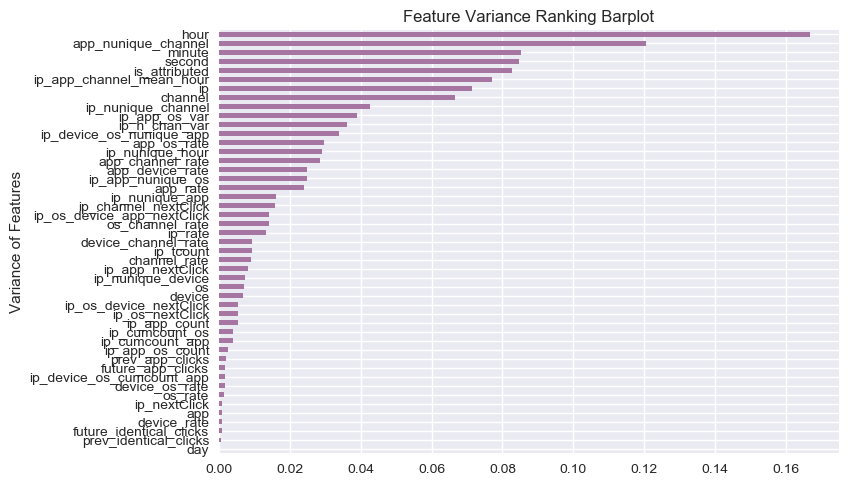

In [83]:
sns.axes_style("darkgrid")
sns.set_style("darkgrid")
var.sort_values().plot(kind='barh', color='#a675a1')
plt.title('Feature Variance Ranking Barplot');
plt.ylabel('Variance of Features');

### Chi-square detection

In [20]:
col_names_1=['ip', 'app', 'device', 'os', 'channel', 'day', 'hour', 'minute', 'second', 'ip_tcount', 'ip_app_count', 'ip_app_os_count', 'ip_h_chan_var', 'ip_app_os_var', 'ip_app_channel_mean_hour', 'ip_rate', 'app_rate', 'device_rate', 'os_rate', 'channel_rate', 'app_channel_rate', 'app_os_rate', 'app_device_rate', 'os_channel_rate', 'device_channel_rate', 'device_os_rate', 'ip_nextClick', 'ip_app_nextClick', 'ip_channel_nextClick', 'ip_os_nextClick', 'ip_os_device_nextClick', 'ip_os_device_app_nextClick', 'prev_identical_clicks', 'future_identical_clicks', 'prev_app_clicks', 'future_app_clicks', 'ip_nunique_channel', 'ip_nunique_app', 'ip_nunique_hour', 'ip_app_nunique_os', 'ip_nunique_device', 'app_nunique_channel', 'ip_device_os_nunique_app', 'ip_device_os_cumcount_app', 'ip_cumcount_app', 'ip_cumcount_os']

In [51]:
col_names_2=['ip', 'app', 'device', 'os', 'channel','day', 'hour', 'ip_tcount', 'ip_app_count', 'ip_app_os_count', 'ip_h_chan_var', 'ip_app_os_var', 'ip_app_channel_mean_hour',  'ip_nextClick', 'ip_app_nextClick', 'ip_channel_nextClick', 'ip_os_nextClick', 'ip_os_device_nextClick', 'ip_os_device_app_nextClick', 'prev_identical_clicks', 'future_identical_clicks', 'prev_app_clicks', 'future_app_clicks', 'ip_nunique_channel', 'ip_nunique_app', 'ip_nunique_hour', 'ip_app_nunique_os', 'ip_nunique_device', 'app_nunique_channel', 'ip_device_os_nunique_app', 'ip_device_os_cumcount_app', 'ip_cumcount_app', 'ip_cumcount_os']

In [52]:
train_minmax_2=train_minmax[col_names_2]

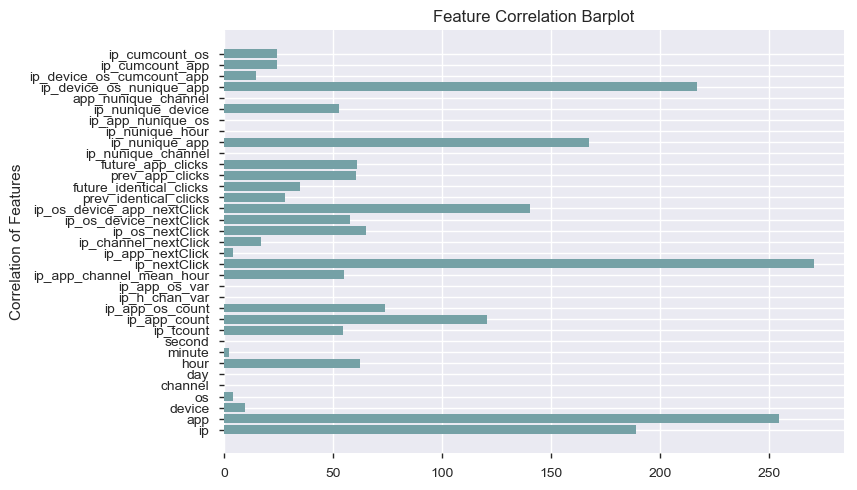

In [22]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2

# Perform feature selection
selector = SelectKBest(chi2, k=10)
selector.fit(train_minmax_2, y_train)

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.title('Feature Correlation Barplot');
plt.ylabel('Correlation of Features');
plt.barh(range(len(train_minmax_2.columns)), scores, color='#75a1a6')
plt.yticks(range(len(train_minmax_2.columns)), train_minmax_2.columns)
plt.show()


### recursive feature elimination

Automatically created module for IPython interactive environment
Optimal number of features : 4


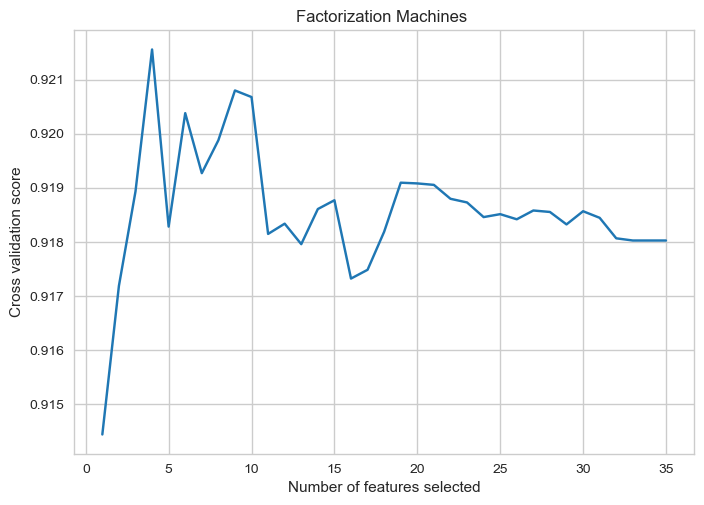

In [23]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features


sns.set_style("whitegrid")
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y_train, 2),
              scoring='accuracy')
rfecv.fit(train_minmax_2, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.title('Factorization Machines ')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Automatically created module for IPython interactive environment
Optimal number of features : 4


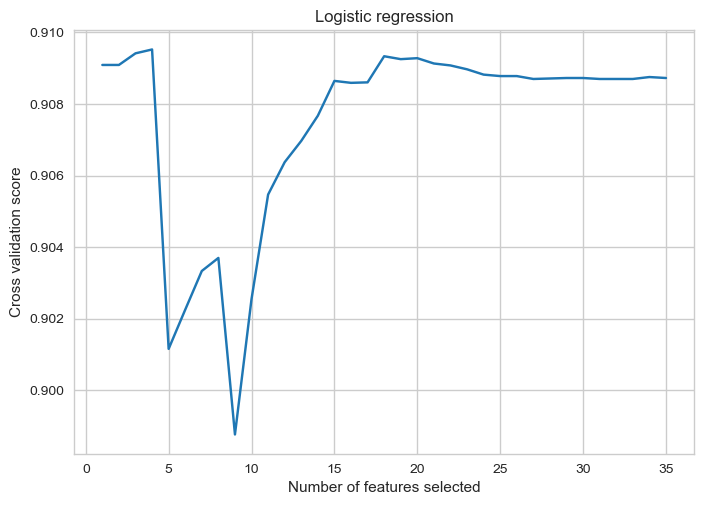

In [24]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# Build a classification task using 3 informative features
lr = LogisticRegression( penalty = 'l1')

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=lr, step=1, cv=StratifiedKFold(y_train, 2),
              scoring='accuracy')
rfecv.fit(train_minmax_2, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores

plt.figure()
plt.title('Logistic regression')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


Automatically created module for IPython interactive environment
Optimal number of features : 2


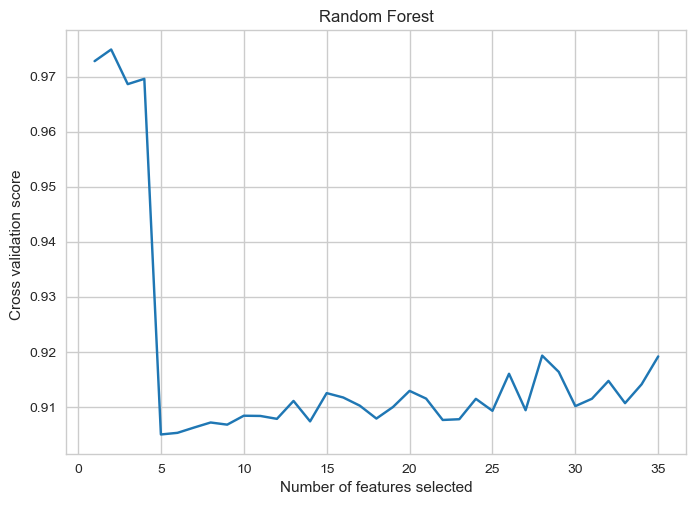

In [25]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Build a classification task using 3 informative features

rfc = RandomForestClassifier()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(y_train, 2),
              scoring='accuracy')
rfecv.fit(train_minmax_2, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores

plt.figure()
plt.title('Random Forest')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score ")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Optimal number of features : 3


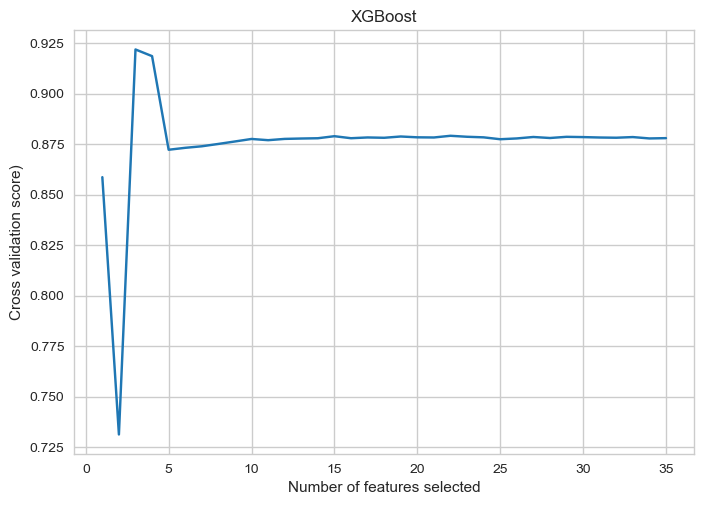

In [26]:
import xgboost as xgb

# Split into X and y
y = y_train
X = train_minmax_2

# Create a model
# Params from: https://www.kaggle.com/aharless/swetha-s-xgboost-revised
clf_xgBoost = xgb.XGBClassifier(
    max_depth = 4,
    subsample = 0.8,
    colsample_bytree = 0.7,
    colsample_bylevel = 0.7,
    scale_pos_weight = 9,
    min_child_weight = 0,
    reg_alpha = 4,
    n_jobs = 4, 
    objective = 'binary:logistic'
)
rfecv = RFECV(estimator=clf_xgBoost, step=1, cv=StratifiedKFold(y_train, 2),
              scoring='accuracy')
rfecv.fit(train_minmax_2, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores

plt.figure()
plt.title('XGBoost')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## XGBoost

In [24]:
import xgboost as xgb

# Split into X and y
y = y_train
X = train_minmax_2.select_dtypes(include=[np.number])

# Create a model
# Params from: https://www.kaggle.com/aharless/swetha-s-xgboost-revised
clf_xgBoost = xgb.XGBClassifier(
    max_depth = 4,
    subsample = 0.8,
    colsample_bytree = 0.7,
    colsample_bylevel = 0.7,
    scale_pos_weight = 9,
    min_child_weight = 0,
    reg_alpha = 4,
    n_jobs = 4, 
    objective = 'binary:logistic'
)
# Fit the models
clf_xgBoost.fit(X, y)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=0, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=4, reg_lambda=1, scale_pos_weight=9, seed=None,
       silent=True, subsample=0.8)

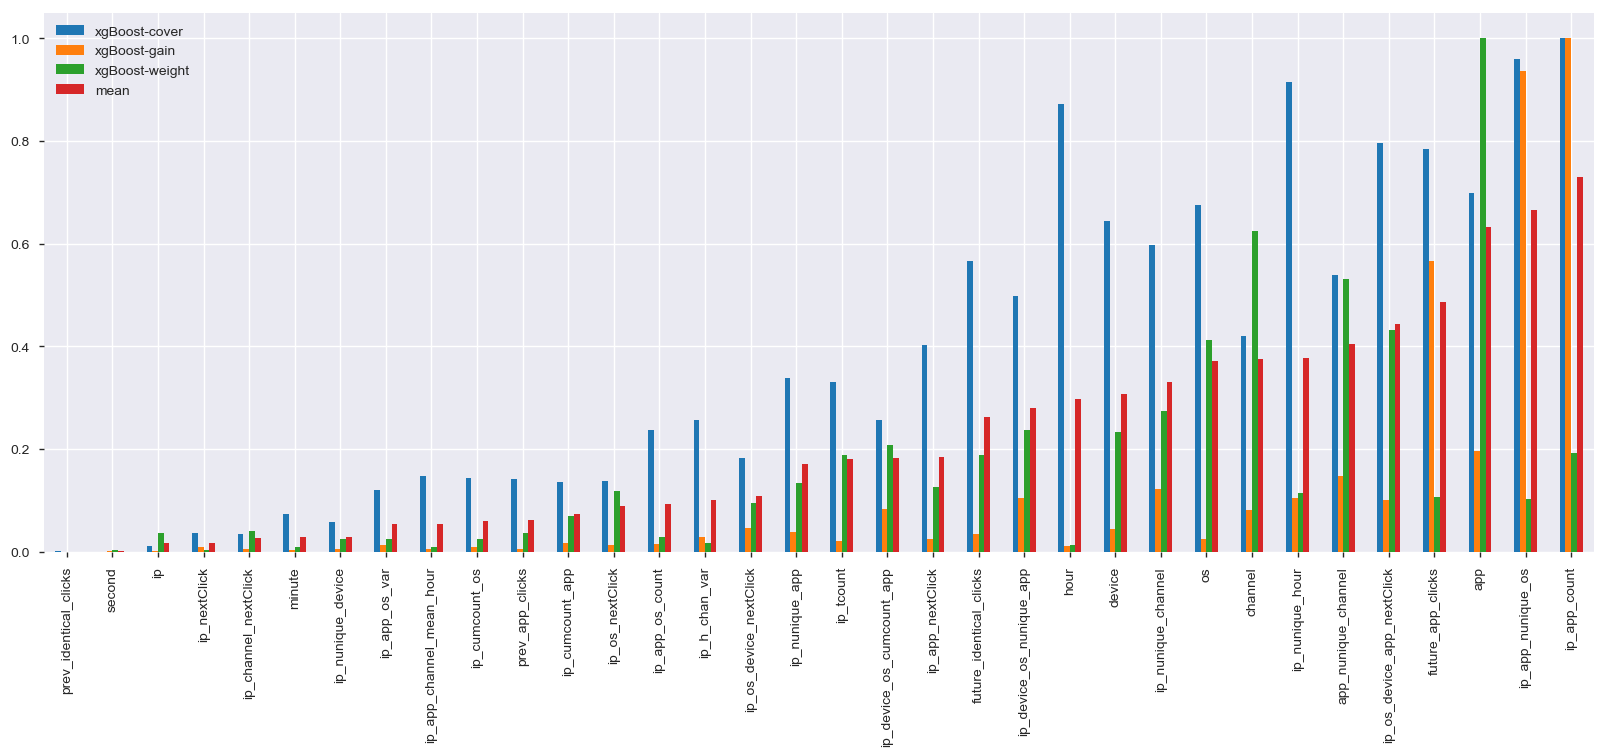

In [25]:
from sklearn import preprocessing

# Get xgBoost importances
importance_dict = {}
for import_type in ['weight', 'gain', 'cover']:
    importance_dict['xgBoost-'+import_type] = clf_xgBoost.get_booster().get_score(importance_type=import_type)
    
# MinMax scale all importances
importance_df = pd.DataFrame(importance_dict).fillna(0)
importance_df = pd.DataFrame(
    preprocessing.MinMaxScaler().fit_transform(importance_df),
    columns=importance_df.columns,
    index=importance_df.index
)

# Create mean column
importance_df['mean'] = importance_df.mean(axis=1)

# Plot the feature importances
importance_df.sort_values('mean').plot(kind='bar', figsize=(20, 7))

## Model importance

In [54]:
features=col_names=['ip', 'app', 'device', 'os', 'channel','day', 'hour', 'minute', 'second', 'ip_tcount', 'ip_app_count', 'ip_app_os_count', 'ip_h_chan_var', 'ip_app_os_var', 'ip_app_channel_mean_hour',  'ip_nextClick', 'ip_app_nextClick', 'ip_channel_nextClick', 'ip_os_nextClick', 'ip_os_device_nextClick', 'ip_os_device_app_nextClick', 'prev_identical_clicks', 'future_identical_clicks', 'prev_app_clicks', 'future_app_clicks', 'ip_nunique_channel', 'ip_nunique_app', 'ip_nunique_hour', 'ip_app_nunique_os', 'ip_nunique_device', 'app_nunique_channel', 'ip_device_os_nunique_app', 'ip_device_os_cumcount_app', 'ip_cumcount_app', 'ip_cumcount_os']

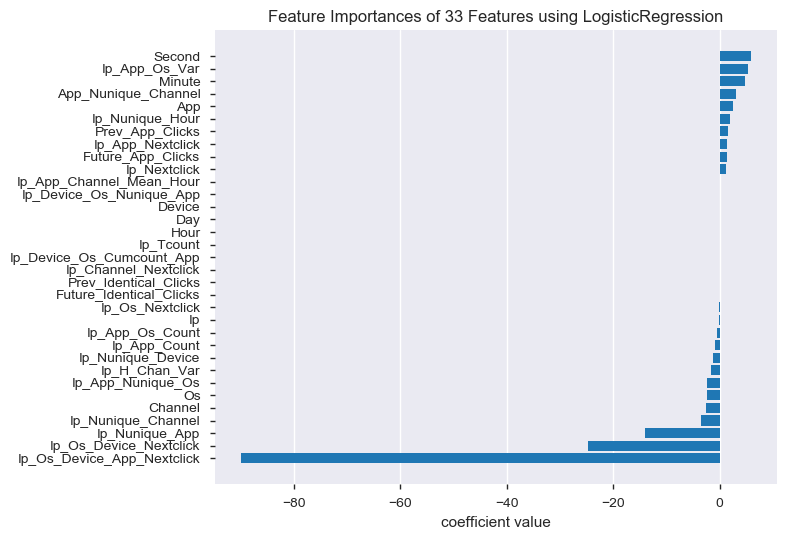

In [55]:
from yellowbrick.features.importances import FeatureImportances
from sklearn.linear_model import LogisticRegression
# Create a new figure
fig = plt.figure()
ax = fig.add_subplot()
y = y_train
X = train_minmax_2
clf = LogisticRegression(penalty='l1')
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(clf, ax=ax, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X, y)
viz.poof()

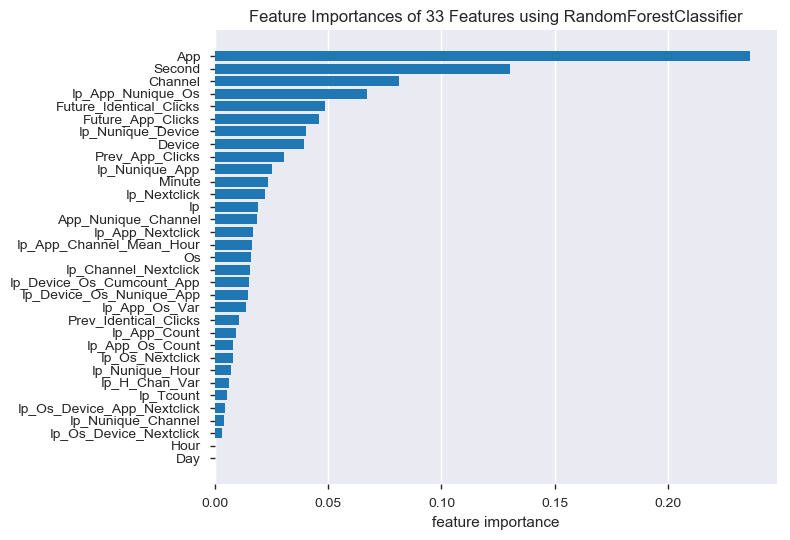

In [56]:
from yellowbrick.features.importances import FeatureImportances
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Create a new figure
fig = plt.figure()
ax = fig.add_subplot()
y = y_train
X = train_minmax_2
rf=RandomForestClassifier()
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(rf, ax=ax, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X, y)
viz.poof()

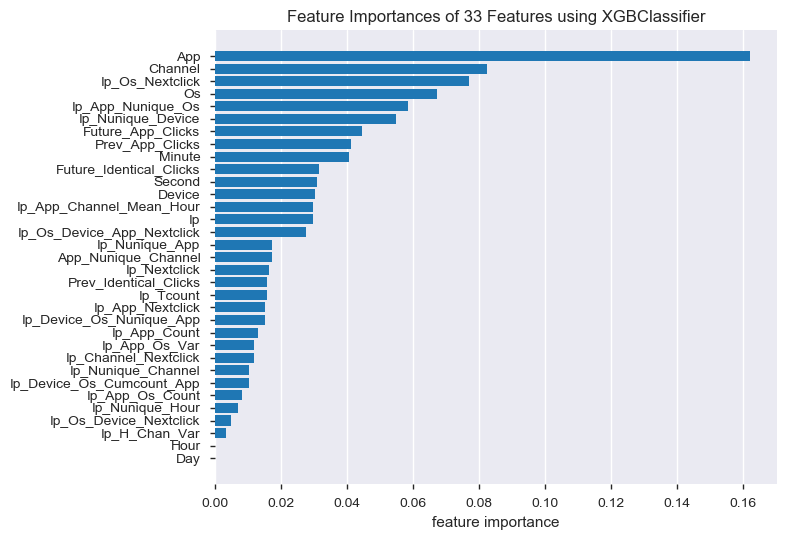

In [57]:
from yellowbrick.features.importances import FeatureImportances
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Create a new figure
fig = plt.figure()
ax = fig.add_subplot()
y = y_train
X = train_minmax_2
clf_xgBoost = xgb.XGBClassifier(
    max_depth = 4,
    subsample = 0.8,
    colsample_bytree = 0.7,
    colsample_bylevel = 0.7,
    scale_pos_weight = 9,
    min_child_weight = 0,
    reg_alpha = 4,
    n_jobs = 4, 
    objective = 'binary:logistic'
)
# Fit the models
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(clf_xgBoost, ax=ax, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X, y)
viz.poof()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
feat_labels=train_minmax_2.columns[1:]
rf=RandomForestClassifier()
y = y_train
X = train_minmax_2
rf.fit(X,y)
importances=rf.feature_importances_
indices=np.argsort(importances)[::-1]

sns.set_style("whitegrid")
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="lightblue",  align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()